Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None

Missing Values:
 Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Number of duplicate rows: 5


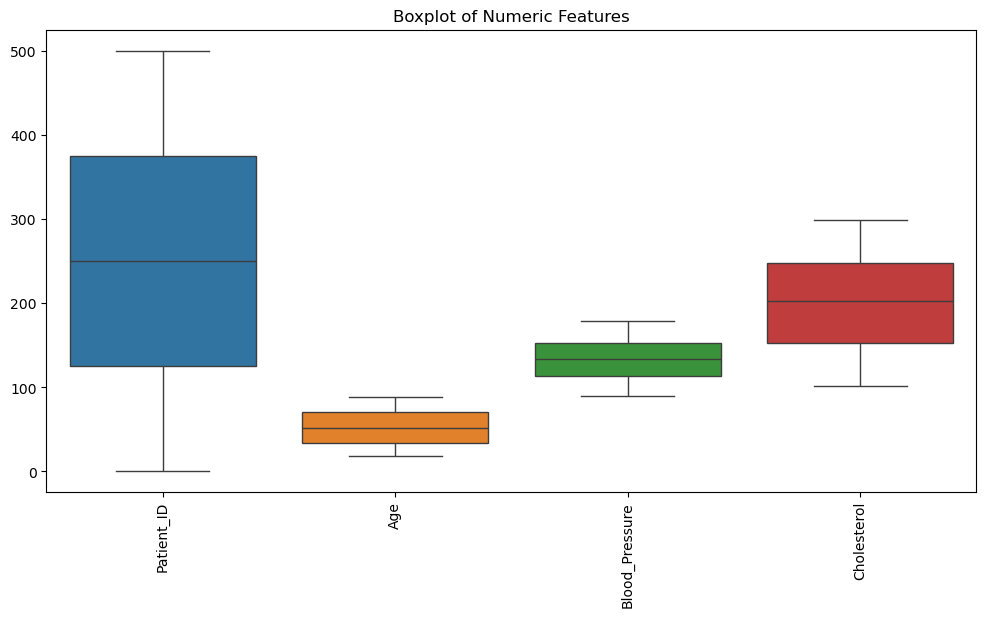

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv(r"C:\Users\varsh\Downloads\Day_16_Healthcare_Data (1).csv")

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Handle Missing Data
imputer = SimpleImputer(strategy="mean")  # You can change strategy to "median" or "most_frequent"
numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Detect and Handle Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Detect and Handle Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()



In [9]:
# Capping Outliers (Replace extreme values with percentiles)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Convert Categorical Variables to Numerical Representation
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

# Standardize and Normalize Data
scaler = MinMaxScaler()  # Change to StandardScaler() if needed
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Data Validation
print("\nFinal Data Info:")
print(df.info())

# Save cleaned dataset
df.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_healthcare_data.csv'")



Final Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      500 non-null    float64
 1   Age             500 non-null    float64
 2   Gender          500 non-null    int32  
 3   Blood_Pressure  500 non-null    float64
 4   Cholesterol     500 non-null    float64
 5   Diabetes        500 non-null    int32  
 6   Heart_Disease   500 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 25.4 KB
None
Cleaned dataset saved as 'cleaned_healthcare_data.csv'
